In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data_location = 'C:/Users/kaley/OneDrive/Documents/Coding Stuff/Data Science/Mental Health Project/Sample Data/'
mood_data_location = data_location+'FinchExport_2025-03-01/Mood.json'
tag_data_location = data_location+'FinchExport_2025-03-01/Tag.json'

In [3]:
mood_series = pd.read_json(mood_data_location, typ='series')
mood_data = pd.json_normalize(mood_series.data)

In [4]:
mood_data.head()

,dt,mood_type,value,updated_time
0,"Sat, 6 May 2023 14:00:58",feeling,4,"Sat, 6 May 2023 14:00:58"
1,"Sun, 11 Feb 2024 04:06:37",satisfaction,4,"Sun, 11 Feb 2024 04:06:37"
2,"Wed, 2 Nov 2022 09:04:11",motivation,3,"Wed, 2 Nov 2022 09:04:11"
3,"Wed, 12 Jul 2023 19:02:37",feeling,3,"Wed, 12 Jul 2023 19:02:37"
4,"Sat, 1 Mar 2025 13:39:47",motivation,2,"Sat, 1 Mar 2025 13:39:47"


In [5]:
mood_data.describe()

,dt,mood_type,value,updated_time
count,3882,3882,3882,3882
unique,3881,3,5,3881
top,"Sun, 25 Aug 2024 04:13:58",feeling,4,"Sun, 25 Aug 2024 04:13:58"
freq,2,2376,2223,2


In [6]:
mood_data['value'] = pd.to_numeric(mood_data.value)

In [7]:
mood_data.dtypes

dt              object
mood_type       object
value            int64
updated_time    object
dtype: object

In [8]:
mood_data.groupby(by=['mood_type']).count()

,dt,value,updated_time
mood_type,,,
feeling,2376,2376,2376
motivation,827,827,827
satisfaction,679,679,679


In [9]:
# these are the three categories of Mood available from my Finch data
# from my understanding, based on using the Finch app, the categories are:
#  * feeling : 1 to 5, "sad" face to "happy" face, how I felt in that moment
#  * motivation : 1 to 5, how motivated I feel for the day ahead, asked when I first open the app that day
#  * satisfaction : 1 to 5, how satisfied I felt for the day, asked at the end of the day

In [10]:
feeling_data = mood_data[mood_data['mood_type'] == 'feeling']

In [11]:
feeling_data = feeling_data[['dt', 'value']]

In [12]:
feeling_data.head()

,dt,value
0,"Sat, 6 May 2023 14:00:58",4
3,"Wed, 12 Jul 2023 19:02:37",3
6,"Tue, 10 Dec 2024 16:48:10",4
8,"Sun, 29 Oct 2023 20:50:48",3
10,"Thu, 27 Oct 2022 00:48:53",3


In [43]:
feeling_data['Datetime'] = pd.to_datetime(feeling_data.dt)
feeling_data['Date'] = feeling_data['Datetime'].dt.date

In [44]:
# looking at the spread of how often I feel each feeling
feeling_data.groupby("value").count()

,dt,Date,Datetime
value,,,
1,33,33,33
2,100,100,100
3,640,640,640
4,1515,1515,1515
5,88,88,88


In [45]:
# looking at motivation
motivation_data = mood_data[mood_data['mood_type'] == 'motivation']

In [46]:
motivation_data.groupby('value').count()

,dt,mood_type,updated_time
value,,,
1,6,6,6
2,50,50,50
3,341,341,341
4,389,389,389
5,41,41,41


In [47]:
satisfaction_data = mood_data[mood_data['mood_type'] == 'satisfaction']

In [48]:
satisfaction_data.head()

,dt,mood_type,value,updated_time
1,"Sun, 11 Feb 2024 04:06:37",satisfaction,4,"Sun, 11 Feb 2024 04:06:37"
7,"Wed, 2 Nov 2022 22:06:19",satisfaction,1,"Wed, 2 Nov 2022 22:06:19"
11,"Sun, 3 Nov 2024 01:17:46",satisfaction,3,"Sun, 3 Nov 2024 01:17:46"
14,"Wed, 14 Dec 2022 03:26:55",satisfaction,4,"Wed, 14 Dec 2022 03:26:55"
16,"Sat, 20 May 2023 00:25:57",satisfaction,4,"Sat, 20 May 2023 00:25:57"


In [49]:
# feeling_data as function of time?

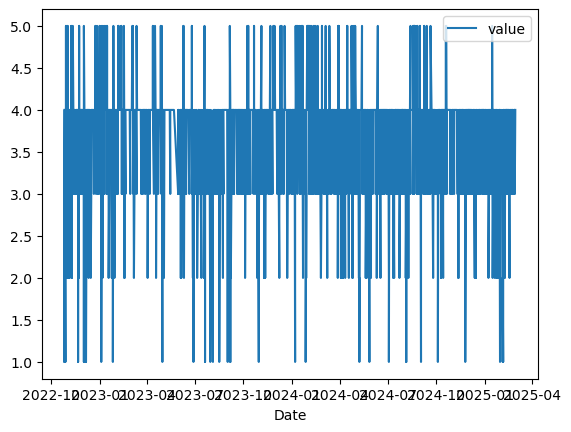

In [50]:
feeling_data.plot(x='Date', y='value');

In [21]:
# the graph isn't super meaningful of course, as moods flucuate too rapidly
# modeling the data and looking for trends and relationships between factors should be better

In [22]:
# feelings (1=bad ... 5=great) as response variable, "effect" ?
# Ordinal Logistic Regression

In [55]:
values = feeling_data['value'].tolist()
dates = feeling_data['Date'].tolist()

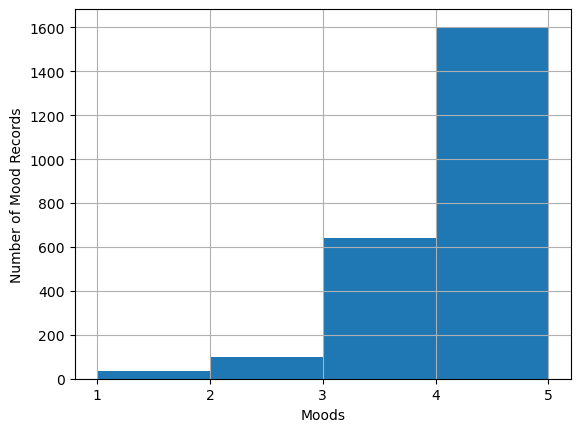

In [56]:
max_val = max(values)
min_val = min(values)
num_bins = 4
jumps = (max_val - min_val)//num_bins

plt.hist(values, bins=num_bins)
plt.grid(True)
plt.xticks(range(min_val,max_val+1,jumps))
plt.xlabel('Moods')
plt.ylabel('Number of Mood Records')
plt.show()

In [72]:
avg_feels = feeling_data.groupby('Date').mean().reset_index()
avg_feels.head()

,Date,value
0,2022-10-26,3.000
1,2022-10-27,3.000
2,2022-10-28,2.875
3,2022-10-29,3.500
4,2022-10-30,3.500


In [84]:
avg_feel_list = avg_feels['value'].tolist()
dates_for_avg = avg_feels['Date'].tolist()

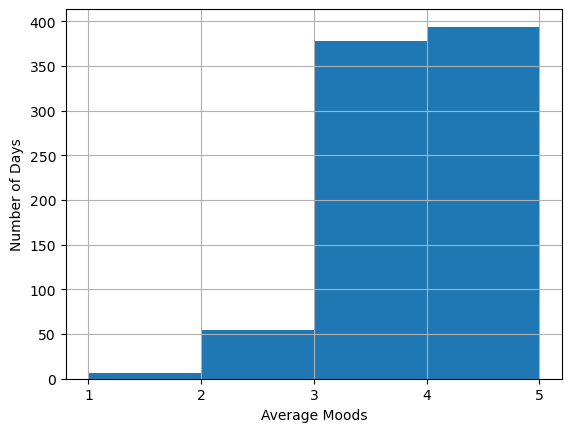

In [83]:
num_bins = 4

plt.hist(avg_feel_list, bins=num_bins)
plt.grid(True)
plt.xticks(range(1,6))
plt.xlabel('Average Moods')
plt.ylabel('Number of Days')
plt.show()

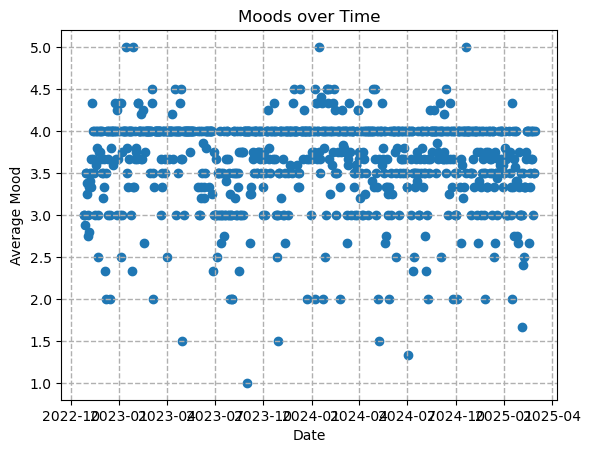

In [90]:
plt.scatter(dates_for_avg, avg_feel_list)
#plt.xticks(dates_for_avg)
plt.xlabel('Date')
plt.ylabel('Average Mood')
plt.title('Moods over Time')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

# Tags

In [26]:
# glancing at the tag data, I'm disapointed not to see a datetime column
# date was the main plan for joining on other data
# I need some sort of explanation for other columns though, tag_type for instance

tag_series = pd.read_json(tag_data_location, typ='series')
tag_data = pd.json_normalize(tag_series.data)

In [27]:
tag_data.head()

,name,tag_type,flags,shape,parent,is_locked,area_names,children,tree_town_id
0,access,4,[9],xxxx,NaN,NaN,NaN,NaN,NaN
1,accomplished,4,[11],xxxx,NaN,NaN,NaN,NaN,NaN
2,adult,4,[9],xxxx,NaN,NaN,NaN,NaN,NaN
3,adventures,4,[9],xxxx,NaN,NaN,NaN,NaN,NaN
4,affirmation,4,[9],xxxx,NaN,NaN,NaN,NaN,NaN


In [28]:
tag_data.groupby('name').count()

,tag_type,flags,shape,parent,is_locked,area_names,children,tree_town_id
name,,,,,,,,
access,1,1,1,0,0,0,0,0
accomplished,1,1,1,0,0,0,0,0
adult,1,1,1,0,0,0,0,0
adventures,1,1,1,0,0,0,0,0
affirmation,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
writing,1,0,0,0,0,1,1,0
yin,1,1,1,0,0,1,1,0
yoga,1,1,1,0,0,1,1,0
